In [1]:
#!/usr/bin/env python
# coding: utf-8
'''
Author: Yuming Fu (fuympku@outlook.com)
Description: Code for source denstiy calculation and visualization with healpy.
'''
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
df = pd.read_csv('/store/public/databases/pugpq/calcounts/GPPcoords.csv')

In [3]:
df.columns

Index(['ra', 'dec'], dtype='object')

In [4]:
coord = SkyCoord(ra=df['ra'].values * u.degree,
                 dec=df['dec'].values * u.degree, frame='icrs')

In [5]:
cgal = coord.transform_to(frame='galactic')

In [6]:
nside = 64
# coord = SkyCoord(l=df['l'].values * u.degree,
#                  b=df['b'].values * u.degree, frame='galactic')
ahp = HEALPix(nside=nside, order='ring', frame=Galactic())
df['pix'] = ahp.skycoord_to_healpix(cgal)
hptb = df.groupby('pix').size()
npix = hp.nside2npix(nside)
hpxmap = np.zeros(npix, dtype=np.float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]
hpxmap[hpxmap == 0] = 'nan'

/home/yuming/anaconda3/lib/python3.6/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/yuming/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1218: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/yuming/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1176: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/yuming/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1198: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/yuming/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1199: RuntimeWarning: invalid value encountered in greate

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
The area per pix is 0.839 deg^2 and the highest density per pix is 16192.187


/home/yuming/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1176: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/yuming/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1198: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/yuming/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1199: RuntimeWarning: invalid value encountered in greater
  result.data[result.data > 1] = 1.0


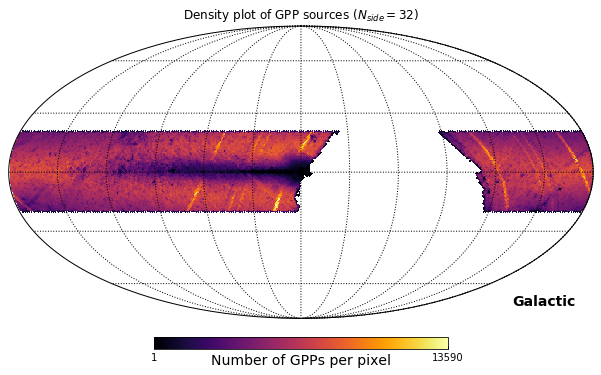

In [7]:
hp.mollview(hpxmap,
            coord=["G"],
            cmap='inferno',
#             badcolor='w',
#             bgcolor='w',
            unit="Number of GPPs per pixel",
            xsize=1000,
            title="Density plot of GPP sources ($N_{side}=32$)")
hp.graticule()
f = plt.gcf()
f.savefig('densGPP.pdf')

pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))


iring = np.arange(npix)
inest = hp.ring2nest(nside, iring)
hp.write_map('GPP_healpixmap.fits',
             m=[iring, inest, hpxmap],
             coord='G',
             column_names=['iring', 'inest', 'map'],
             fits_IDL=False,
             overwrite=True)

In [8]:
np.nanmedian(hpxmap)

5900.0

In [9]:
np.nanmean(hpxmap)

5630.240205936771

In [10]:
np.nanmax(hpxmap)

13590.0